# Predicting the prices of houses in California using Linear Regression.

## Content 
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

<b>longitude</b> : A measure of how far west a house is; a higher value is farther west

<b>latitude</b> : A measure of how far north a house is; a higher value is farther north

<b>housingmedianage</b> : Median age of a house within a block; a lower number is a newer building

<b>total_rooms</b> : Total number of rooms within a block

<b>total_bedrooms</b> : Total number of bedrooms within a block

<b>population</b> : Total number of people residing within a block

<b>households</b> : Total number of households, a group of people residing within a home unit, for a block

<b>median_income</b> : Median income for households within a block of houses (measured in tens of thousands of US Dollars)

<b>medianhousevalue</b> : Median house value for households within a block (measured in US Dollars)

<b>ocean_proximity</b> :  Location of the house w.r.t ocean/sea

## Acknowledgements
This data was initially featured in the following paper:
Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

and I encountered it in 'Hands-On Machine learning with Scikit-Learn and TensorFlow' by Aurélien Géron.
Aurélien Géron wrote:
This dataset is a modified version of the California Housing dataset available from:
Luís Torgo's page (University of Porto)

#### Importing dependencies

In [119]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from pandas.plotting import scatter_matrix

In [120]:
cali = pd.read_csv('housing.csv')

In [121]:
cali.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [122]:
cali.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


#### Data Wrangling

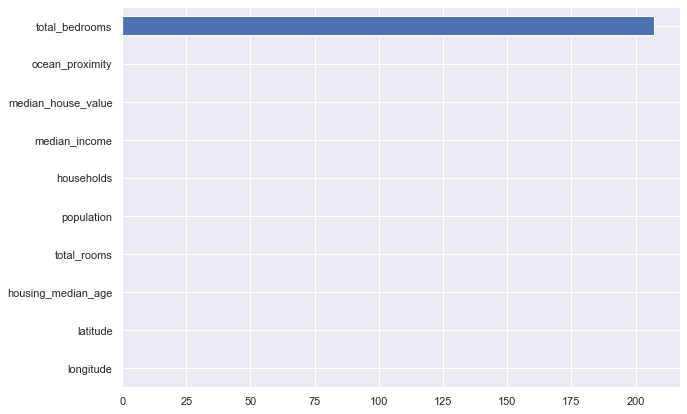

In [123]:
sns.set()
cali.isna().sum().sort_values(ascending = True).plot(kind ='barh',figsize = (10,7))

In [124]:
#Dropping the missing values in our dataset
missing_data = cali.dropna(inplace=True)
cali.isna().sum()
#checking if the data has been cleaned
total_null = cali.isna().sum().sort_values(ascending=False)
percent = (cali.isna().sum()/cali.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total_null, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
ocean_proximity,0,0.0
median_house_value,0,0.0
median_income,0,0.0
households,0,0.0
population,0,0.0
total_bedrooms,0,0.0
total_rooms,0,0.0
housing_median_age,0,0.0
latitude,0,0.0
longitude,0,0.0


In [125]:
cali.drop(['ocean_proximity'],axis = 1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


#### Inspecting our data (Exploratory Data Analysis)

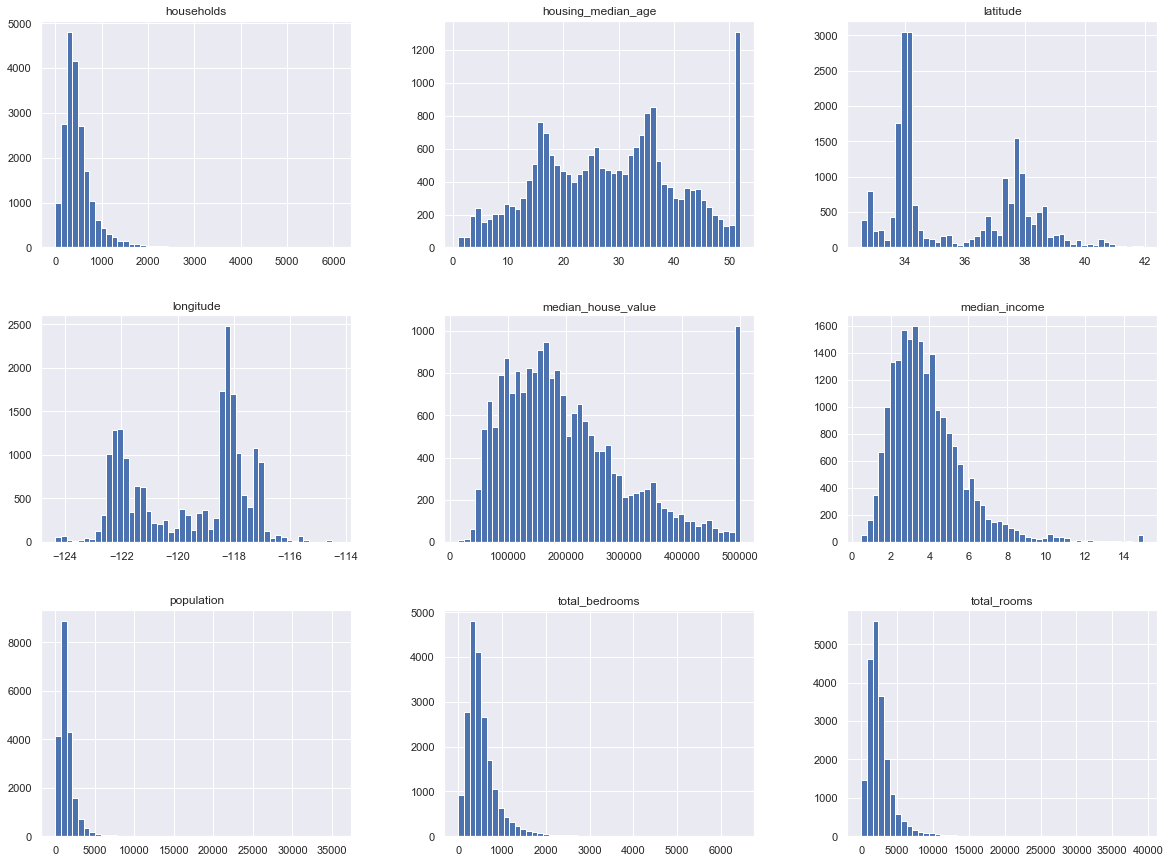

In [126]:
#Plotting histograms
cali.hist(bins = 50, figsize = (20,15))
plt.show();

##### Histograms are used to represent the quantity of each attribute.

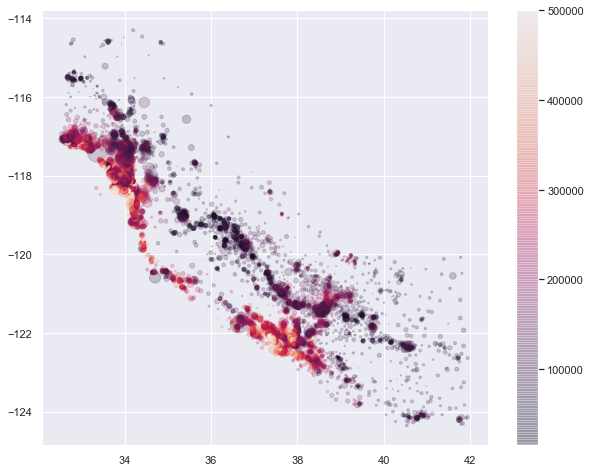

In [127]:
#Plotting a Scatterplot
plt.figure(figsize = (10,8))
plt.scatter(cali.latitude,cali.longitude,alpha = 0.2,c = cali.median_house_value, s = cali.population/100)
plt.colorbar()

##### The scatterplot resembles the shape of California and the intensity of the color represents the population based on latitude and longitude.

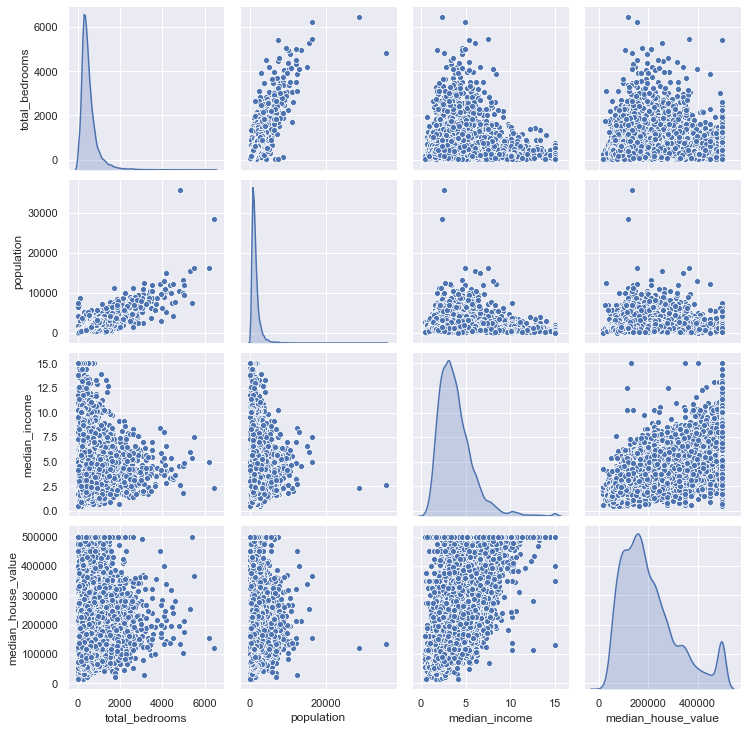

In [128]:
sns.pairplot(cali[["total_bedrooms","population","median_income","median_house_value"]],diag_kind = "kde")

###### A pairplot plots a pairwise relationship in a dataset. 


#### Data Pre-processing

In [129]:
y = cali['median_house_value']
x = cali[['median_income','total_rooms','housing_median_age']]

In [130]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2)
#X = train['median_income'].values.reshape(-1,1)
#y = train['median_house_value']
train = x_train.join(y_train)
corr_mat = train.corr()

###### The correlation Matrix will give us an idea of the extent to which features are related to each other 

In [131]:
corr_mat['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687181
total_rooms           0.129442
housing_median_age    0.109315
Name: median_house_value, dtype: float64

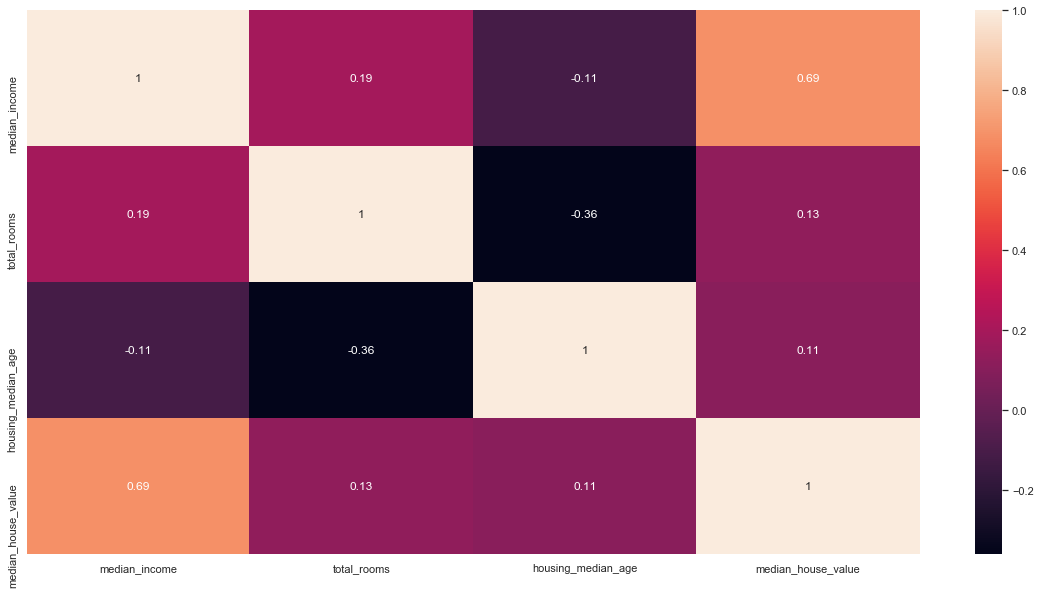

In [132]:
fig = plt.subplots(figsize = (20,10))
sns.heatmap(train.corr(), annot = True)

#### ML- Technique used: Linear Regression model
Based on our correlation matrix, we can see that value of a house is strongly correlated to median house income, hence we will try to model the relationship using a linear regression model.

##### Performing Multiple Linear Regression : Predicting median value of house using features such as house age, income, total rooms

In [133]:
linear_regression = LinearRegression()
linear_regression.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
y_pred = linear_regression.predict(x)
y_pred

array([413898.93208943, 397236.02754715, 392466.64818204, ...,
        90133.82805122,  97706.28418405, 119468.57503785])

#### Measuring Accuracy of the model.
###### Metrics to measure used:
<ol>
    <li>Accuracy Score</li>
    <li>Mean Square Error</li>
    <li>Mean Absolute Error</li>
    <li>Regression Co-efficient</li>
   </ol>

In [135]:
acc = linear_regression.score(x_test, y_test)
acc_percentage = acc*100
acc_percentage

52.276056987143846

##### Our model has around 52% accuracy.

In [136]:
#measuring accuracy using mae and mse
mse = mean_squared_error(y_pred,y)
np.sqrt(mse)

80466.75455049712

In [137]:
mae = mean_absolute_error(y_pred,y)
np.sqrt(mae)

245.08221832398775

In [138]:
#in a linear regression y = mx + c ( m is the coefficient for generating the model) )
print('Coefficients: \n', linear_regression.coef_)

Coefficients: 
 [4.25126044e+04 3.83150571e+00 1.97396193e+03]
